## **Effect of High winds on Straight path following UAV using AOGL**

20.36 19.13 49.99


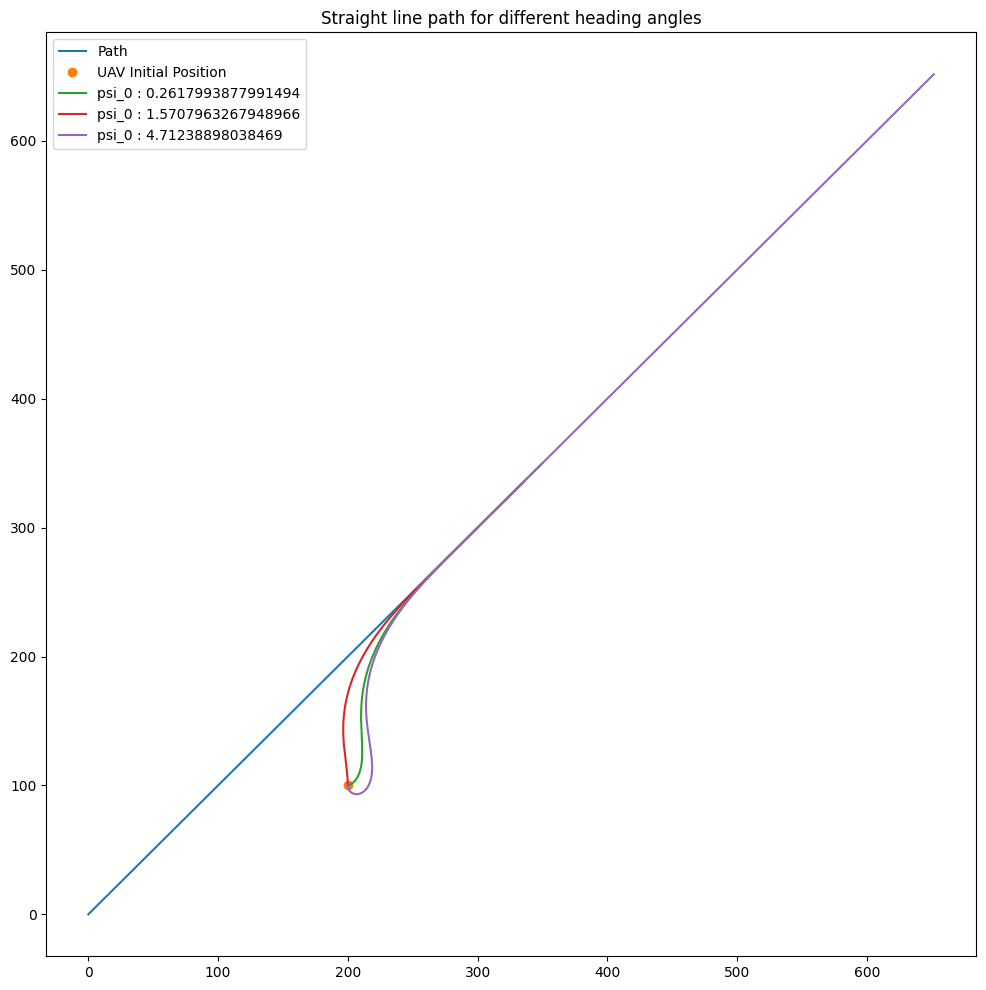

In [ ]:
import matplotlib.pyplot as plt
import math
import numpy as np


W_1 = [0,0] #Waypoint 1
W_2 = [300,300] # Waypoint 2
p = [200,100] # Initial Position of UAV

V = 15
psi_p = math.atan2(W_2[1] - W_1[1], W_2[0] - W_1[0])

dt = 0.01
T = 50

nt = int(T/dt)

x = np.zeros(nt+1) # Position of UAV (x,y)
y = np.zeros(nt+1)
psi = np.zeros(nt+1)
vx = np.zeros(nt+1)
vy = np.zeros(nt+1)
d = np.zeros(nt+1)

def plot_path(flag : bool = True):
  dx = (W_2[0] - W_1[0])/nt
  X = np.zeros(nt+1)
  X[0] = W_1[0]
  for i in range(nt+1):
    X[i] = X[i-1] + dx
  dy = (W_2[1] - W_1[1])/nt
  Y = np.zeros(nt+1)
  for j in range(nt+1):
    Y[j] = Y[j-1] + dy

  plt.plot(X, Y, label = 'Path')
  # axes.plot(X, Y, label = 'Path')
  plt.legend()
  if(flag):
    plt.plot(p[0], p[1], 'o', label = 'UAV Initial Position')
    plt.legend()

def solve(psi_0, Label):
  x[0] = p[0] # x -> array of x coordinates, p -> Inital Location of UAV
  y[0] = p[1] # Y -> array of y coordinates
  psi[0] = psi_0
  vx[0] = V * math.cos(psi[0])
  vy[0] = V * math.sin(psi[0])
  d_b = 4

  for t in range(0, nt):

    # Computation of LQR variables
    theta = math.atan2(y[t] - W_1[1], x[t] - W_1[0])
    beta = theta - psi_p
    R_x = x[t] - W_1[0]
    R_y = y[t] - W_1[1]
    R = math.sqrt((R_x ** 2) + (R_y ** 2))
    d[t] = R * math.sin(beta)
    q1 = math.sqrt(abs(d_b/(d_b - d[t])))
    q2 = math.sqrt(2*q1 + 1)
    vd = V * math.sin(psi[t] - psi_p)
    u = -(q1 * d[t] + q2 * vd) # Lateral Input acceleration


    # Numerical Integeration of Equations of Motion
    psi[t+1] = psi[t] + (u/V) * dt

    x_ddot = -u * math.sin(psi[t+1])
    y_ddot = u * math.cos(psi[t+1])

    vx[t+1] = V * math.cos(psi[t+1])
    vy[t+1] = V * math.sin(psi[t+1])

    x[t+1] = x[t] + vx[t] * dt + x_ddot * (dt ** 2)/2
    y[t+1] = y[t] + vy[t] * dt + y_ddot * (dt ** 2)/2 # Taylor's Method order 2. y(x+h) = y(x) + y'(x) dx + y"(x) (dx^2)/2

    if(abs(d[t]) < 1e-6 and abs(psi[t] - psi_p) < 1e-3):
      x[t+2:] = x[t+1]
      y[t+2:] = y[t+1]
      vx[t+2:] = vx[t+1]
      vy[t+2:] = vy[t+1]
      psi[t+2:] = psi[t+1]
      d[t+1:] = d[t]
      break
  plt.plot(x, y, label = Label)
  plt.legend()
  return t * dt


plt.figure(figsize = (12,12))
plot_path()
t1 = solve(math.pi/12, f"psi_0 : {math.pi/12}")
t2 = solve(math.pi/2, f"psi_0 : {math.pi/2}")
t3 = solve(3 * math.pi/2, f"psi_0 : {3 * math.pi/2}")
plt.title('Straight line path for different heading angles')

print(t1, t2, t3)



